In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='factors')
df.set_index('Date', inplace=True)
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031


### 2. The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a size and value factor. Note that these three factors are already listed as excess returns.

#### 1. The Factors
Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe
- VaR(.05)

Report these for the following three subsamples:
- Beginning - 1980
- 1981 - 2001
- 2002 - End

In [5]:
# Define the subsample date ranges
# Beginning - 1980: everything up through 1980-12-31
df1 = df.loc[:'1980-12-31']
# 1981 - 2001: 1981-01-01 through 2001-12-31
df2 = df.loc['1981-01-01':'2001-12-31']
# 2002 - End: 2002-01-01 and later
df3 = df.loc['2002-01-01':]

# Calculate stats for each subsample
def get_stats(subdf):
    mean = subdf.mean() * 12
    vol = subdf.std() * np.sqrt(12)
    sharpe = mean / vol
    VaR = subdf.quantile(.05)
    return mean, vol, sharpe, VaR

mean1, vol1, sharpe1, VaR1 = get_stats(df1)
mean2, vol2, sharpe2, VaR2 = get_stats(df2)
mean3, vol3, sharpe3, VaR3 = get_stats(df3)

In [6]:
print("=== Beginning - 1980 ===")
print("Mean:\n", mean1)
print("Volatility:\n", vol1)
print("Sharpe:\n", sharpe1)
print("VaR(.05):\n", VaR1)

=== Beginning - 1980 ===
Mean:
 Mkt-RF    0.080958
SMB       0.033914
HML       0.050321
RF        0.027730
dtype: float64
Volatility:
 Mkt-RF    0.204988
SMB       0.114277
HML       0.134228
RF        0.007673
dtype: float64
Sharpe:
 Mkt-RF    0.394938
SMB       0.296769
HML       0.374893
RF        3.614032
dtype: float64
VaR(.05):
 Mkt-RF   -0.084090
SMB      -0.041875
HML      -0.044245
RF        0.000000
Name: 0.05, dtype: float64


In [7]:
print("\n=== 1981 - 2001 ===")
print("Mean:\n", mean2)
print("Volatility:\n", vol2)
print("Sharpe:\n", sharpe2)
print("VaR(.05):\n", VaR2)


=== 1981 - 2001 ===
Mean:
 Mkt-RF    0.077852
SMB      -0.002014
HML       0.064557
RF        0.063081
dtype: float64
Volatility:
 Mkt-RF    0.157183
SMB       0.117260
HML       0.109863
RF        0.007752
dtype: float64
Sharpe:
 Mkt-RF    0.495298
SMB      -0.017178
HML       0.587613
RF        8.137239
dtype: float64
VaR(.05):
 Mkt-RF   -0.064135
SMB      -0.045880
HML      -0.041640
RF        0.002455
Name: 0.05, dtype: float64


In [8]:
print("\n=== 2002 - End ===")
print("Mean:\n", mean3)
print("Volatility:\n", vol3)
print("Sharpe:\n", sharpe3)
print("VaR(.05):\n", VaR3)


=== 2002 - End ===
Mean:
 Mkt-RF    0.091306
SMB       0.007931
HML       0.001204
RF        0.015837
dtype: float64
Volatility:
 Mkt-RF    0.153529
SMB       0.088448
HML       0.106442
RF        0.005213
dtype: float64
Sharpe:
 Mkt-RF    0.594711
SMB       0.089669
HML       0.011313
RF        3.038090
dtype: float64
VaR(.05):
 Mkt-RF   -0.077265
SMB      -0.039195
HML      -0.041485
RF        0.000000
Name: 0.05, dtype: float64


#### 2.
Based on the factor statistics above, answer the following.
- Does each factor have a premium (positive expected excess return) in each subsample?
- Does the premium to the size factor get smaller after 1980?
- Does the premium to the value factor get smaller during the 1990’s?
- How have the factors performed since the time of the case, (2002-present)?

### Answers to 2

1. The SMB factor in the 2nd subsample does not have a premium. The others do in all subsamples.
2. The SMB factor gets smaller (goes negative) after 1980, but then jumps up to .007 in the 2002 & on subset.
3. The 90s are included in the second subsample along with the 80s. The factor premium stays similar from the 80s through the 90s & drops heavily in the 2000s.
4. The mkt return factor has increased in the 3rd subsample, while the other two are close to zero.

#### 3.
The factors are constructed in such a way as to reduce correlation between them.
- Report the correlation matrix across the three factors.
- Does the construction method succeed in keeping correlations small?
- Does it achieve this in each subsample?

==== All Data ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.320443  0.227832
SMB     0.320443  1.000000  0.125828
HML     0.227832  0.125828  1.000000


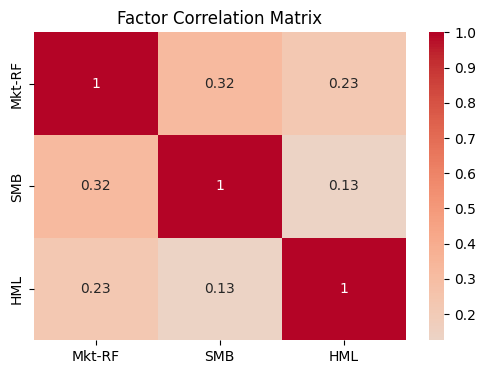

In [9]:
cor_matrix = df[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== All Data ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

==== Start - 1980 ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.374234  0.442341
SMB     0.374234  1.000000  0.313397
HML     0.442341  0.313397  1.000000


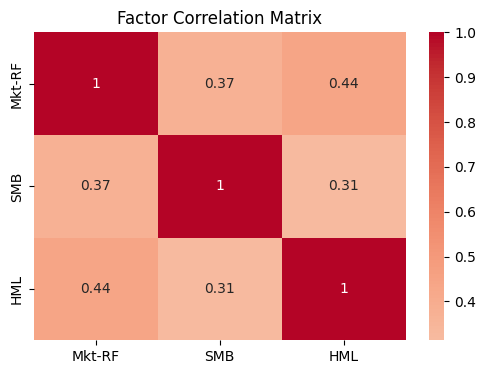

In [10]:
cor_matrix = df1[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== Start - 1980 ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

==== Start - 1980 ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.158652 -0.529912
SMB     0.158652  1.000000 -0.445451
HML    -0.529912 -0.445451  1.000000


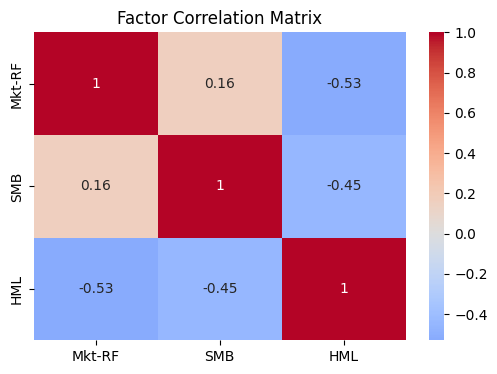

In [11]:
cor_matrix = df2[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== Start - 1980 ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

==== 2002 - Present ====
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.316034  0.109671
SMB     0.316034  1.000000  0.116227
HML     0.109671  0.116227  1.000000


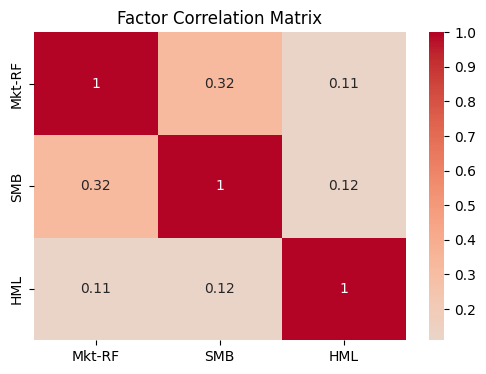

In [12]:
cor_matrix = df3[['Mkt-RF', 'SMB', 'HML']].corr()
print("==== 2002 - Present ====")
print(cor_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Factor Correlation Matrix")
plt.show()

### Answers to 3

In the large sample, correlations are pretty low (~.30).
In the individual subsamples, the 2nd subsample (1981 - 1990) had the value factor more (negatively) correlated with the two others. In the 1st & 3rd subsamples, these correlations were capped at around (~.30)

#### 4.
- Plot the cumulative returns of the three factors.
- Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

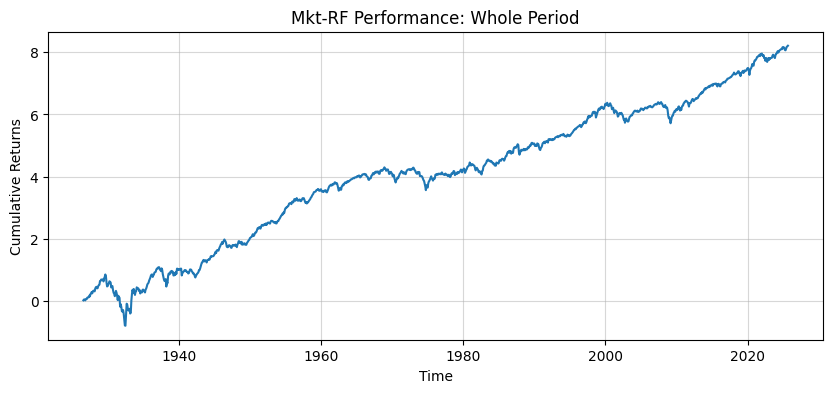

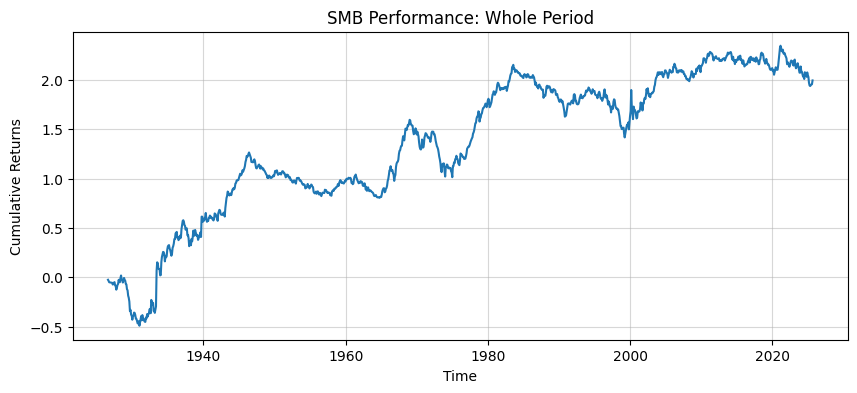

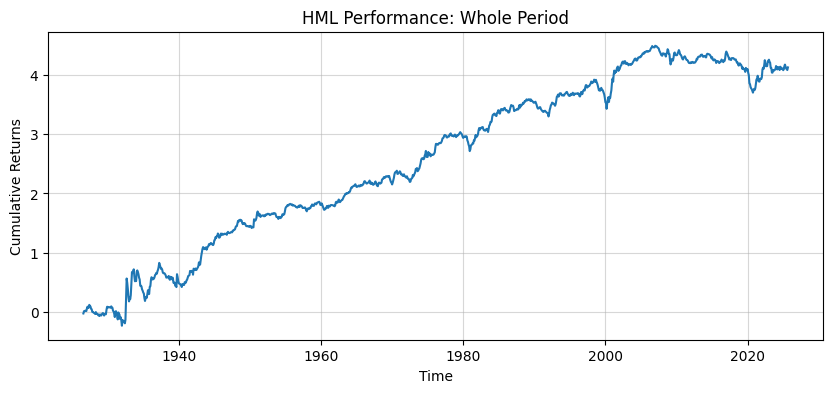

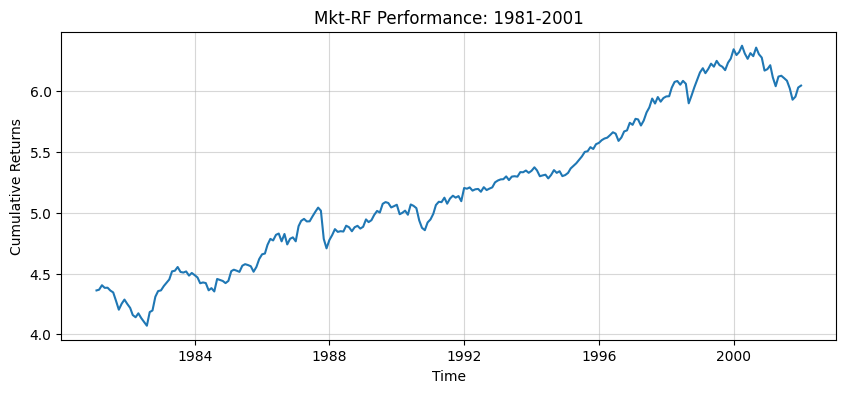

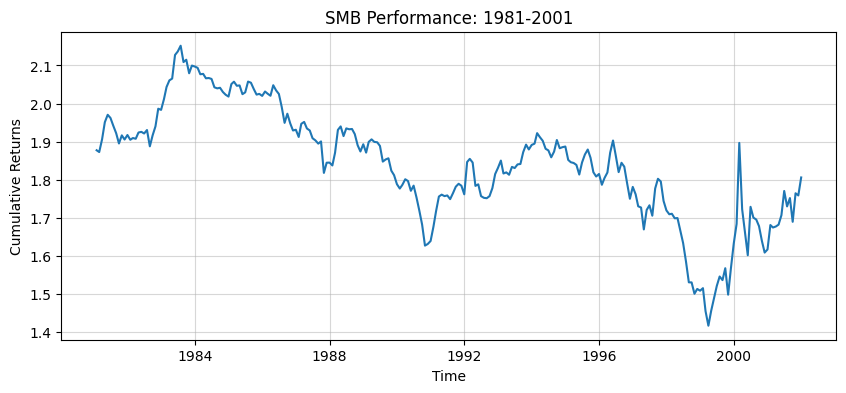

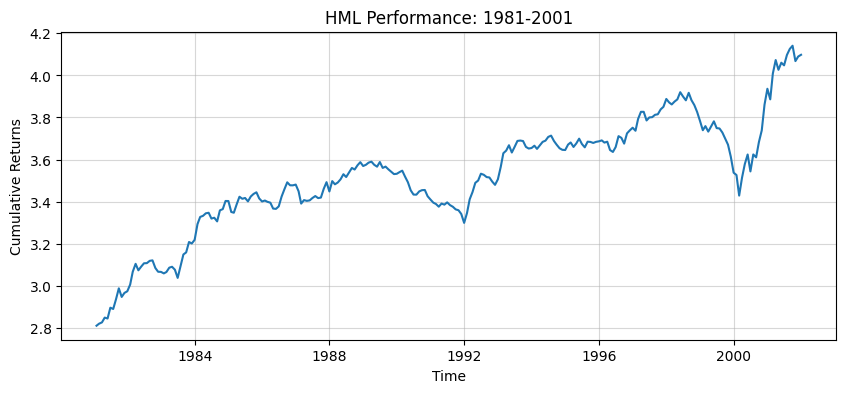

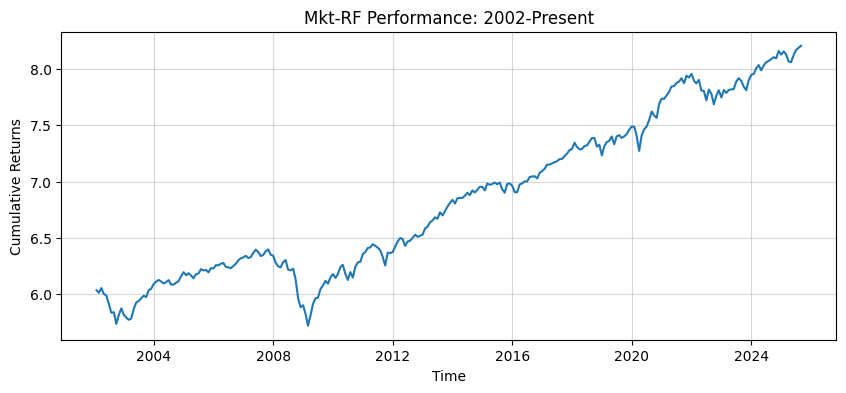

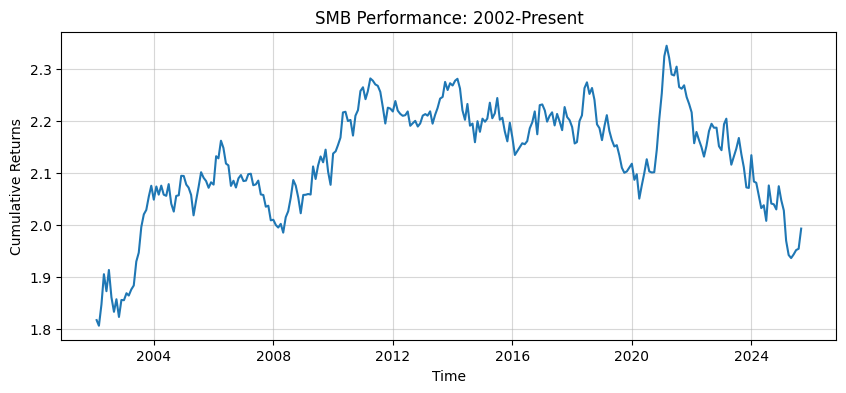

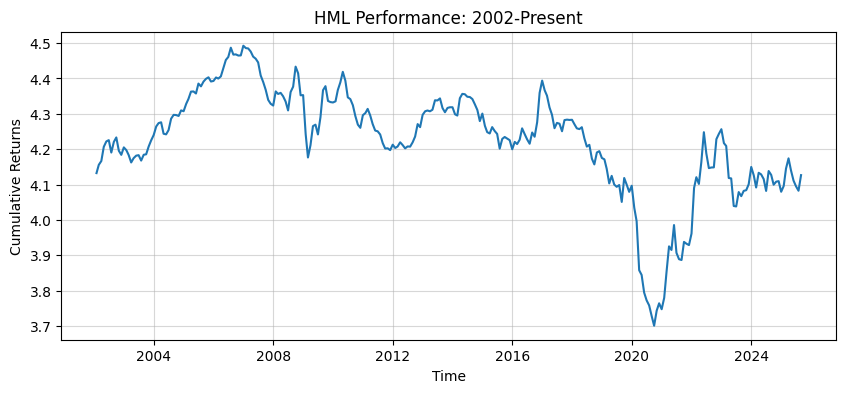

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='factors', index_col=0)
df.index = pd.to_datetime(df.index)

# compute cumulative returns
# df_cum_ret = (df+1).cumprod()
df_cum_ret = df.cumsum()
ls_factors = df_cum_ret.columns[:3]

def plot_cum_ret(factor, df_cum_ret, period):
    plt.figure(figsize=(10,4))
    plt.plot(df_cum_ret[factor])
    plt.title(f"{factor} Performance: {period}")
    plt.grid(alpha=0.5)
    plt.xlabel("Time")
    plt.ylabel("Cumulative Returns")
    plt.show()

# whole period
for factor in ls_factors:
    plot_cum_ret(factor, df_cum_ret, "Whole Period")

# 1981-2001 subsample
df_cum_ret_sub1 = df_cum_ret.loc["1981-01-01":"2002-01-01"]
for factor in ls_factors:
    plot_cum_ret(factor, df_cum_ret_sub1, "1981-2001")

# 2002 subsample
df_cum_ret_sub2 = df_cum_ret.loc["2002-01-01":]
for factor in ls_factors:
    plot_cum_ret(factor, df_cum_ret_sub2, "2002-Present")

#### 5.
- Does it appear that all three factors were valuable in 1981-2001?
- And post-2001?

Would you advise DFA to continue emphasizing all three factors?

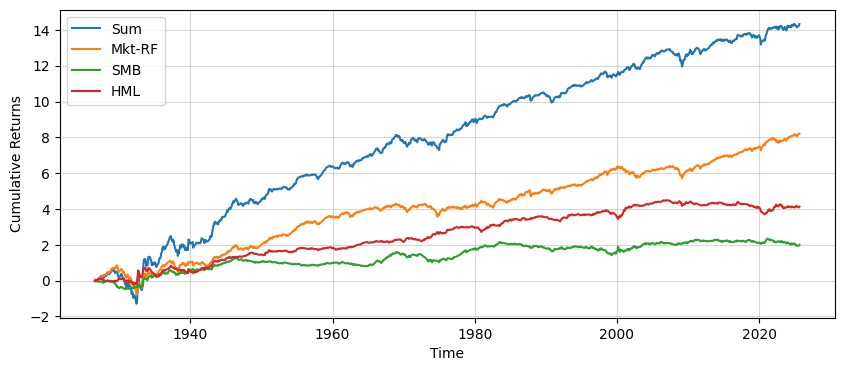

Whole Period Sharpe Ratio
          sharpe
Mkt-RF  0.449507
SMB     0.183858
HML     0.337699
sum     0.487952


Prior to 1981 Sharpe Ratio
          sharpe
Mkt-RF  0.394938
SMB     0.296769
HML     0.374893
sum     0.468011


1981 to 2001 Sharpe Ratio
          sharpe
Mkt-RF  0.495298
SMB    -0.017178
HML     0.587613
sum     0.860885


Post 2001 Sharpe Ratio
          sharpe
Mkt-RF  0.594711
SMB     0.089669
HML     0.011313
sum     0.420405




In [14]:
df['sum'] = df[df.columns[:3]].sum(axis=1) # invest all 3 factors

plt.figure(figsize=(10,4))
plt.plot(df['sum'].cumsum(), label = "Sum")
plt.plot(df['Mkt-RF'].cumsum(), label = "Mkt-RF")
plt.plot(df["SMB"].cumsum(), label = "SMB")
plt.plot(df['HML'].cumsum(), label = "HML")
plt.legend()
plt.grid(alpha = 0.5)
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.show()

# Show the individual Sharpe Ratios for the three factors, and the Sharpe Ratio for the combined portfolio (invested in all three factors).

def get_shp_df(df):

    df_shp = pd.DataFrame((df.mean()*12) / (df.std()*np.sqrt(12)))
    df_shp.columns = ['sharpe']
    df_shp.drop(index = "RF", inplace=True)
    print(df_shp)
    print("\n")
    return df_shp

print("Whole Period Sharpe Ratio")
df_shp_whole = get_shp_df(df)
print("Prior to 1981 Sharpe Ratio")
df_shp_p1 = get_shp_df(df.loc[:"1981-01-01"])
print("1981 to 2001 Sharpe Ratio")
df_shp_p2 = get_shp_df(df.loc["1981-01-01":"2002-01-01"])
print("Post 2001 Sharpe Ratio")
df_shp_p3 = get_shp_df(df.loc["2002-01-01":])

# Answer to Question 5

- SMB underperformed from 1981 to 2001. Since 2001, both SMB and HML have underperformed.

- DFA should continue its emphasis on all three factors, as this approach generally enhances the portfolio's Sharpe Ratio.

### 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors.

Let’s test 25 equity portfolios that span a wide range of size and value measures.

#### Portfolios
Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as $\vec{r}^i$, for $n = 1, \dots, 25$.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

#### 1. Summary Statistics.
For each portfolio,
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from 1.1.

In [15]:
port = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='portfolios (total returns)')
port.set_index('Date', inplace=True)
port

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-31,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-30,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284
1926-10-31,-0.093633,-0.035519,-0.035024,0.034413,-0.025452,-0.028014,-0.044191,-0.050767,-0.080271,-0.013213,...,-0.039136,-0.026528,-0.021058,-0.032532,-0.053525,-0.027382,-0.030061,-0.022467,-0.046725,-0.058129
1926-11-30,0.055888,0.041877,0.024384,-0.044495,0.005110,0.031023,-0.017317,0.030425,0.049538,0.027292,...,0.034492,0.023823,0.037315,0.051102,0.018213,0.044331,0.025355,0.015280,0.036596,0.025636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.008068,0.016903,0.008944,-0.006342,-0.025251,0.005969,-0.009047,-0.024543,-0.031368,-0.063772,...,-0.008766,-0.012699,-0.020146,-0.039276,-0.072668,0.014106,-0.030129,-0.073867,-0.013472,-0.027941
2025-05-31,0.108449,0.057624,0.053431,0.042479,0.057172,0.044605,0.050800,0.069533,0.050692,0.058568,...,0.062577,0.050222,0.035353,0.081175,0.065826,0.078077,0.061296,0.018407,0.026156,0.065684
2025-06-30,0.138579,0.058805,0.086403,0.046825,0.055347,0.062285,0.066343,0.073562,0.056160,0.050304,...,0.020351,0.043192,0.024175,0.073815,0.058024,0.055279,0.062451,0.047405,0.036424,0.070109


In [16]:
port_sub = port.loc['1981-01-01':]
df_sub = df.loc['1981-01-01':]
xr = port_sub.sub(df_sub['RF'], axis=0)

stats = pd.DataFrame(index=xr.columns)
stats['Mean (Annualized)'] = xr.mean() * 12
stats['Vol (Annualized)'] = xr.std() * np.sqrt(12)
stats['Sharpe'] = stats['Mean (Annualized)'] / stats['Vol (Annualized)']
stats['VaR(5%)'] = xr.quantile(0.05)

stats.round(4)

,Mean (Annualized),Vol (Annualized),Sharpe,VaR(5%)
SMALL LoBM,0.0117,0.2717,0.0431,-0.1249
ME1 BM2,0.0884,0.2354,0.3756,-0.0949
ME1 BM3,0.0902,0.2008,0.4493,-0.0848
ME1 BM4,0.1125,0.1940,0.5800,-0.0776
SMALL HiBM,0.1273,0.2084,0.6110,-0.0882
ME2 BM1,0.0609,0.2447,0.2490,-0.1032
ME2 BM2,0.0984,0.2054,0.4790,-0.0834
ME2 BM3,0.1052,0.1864,0.5640,-0.0803
ME2 BM4,0.1081,0.1819,0.5942,-0.0753
ME2 BM5,0.1132,0.2137,0.5298,-0.0933


#### 2. CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT).

Specifically, it asserts that, for any excess return, $\tilde{r}^i$, its mean is proportional to the mean excess return of the market, $\tilde{r}^\text{{mkt}}$, where the proporitonality is the regression beta of $\tilde{r}^i$ on $\tilde{r}^\text{{mkt}}$.

$$
\mathbb{E}[\tilde{r}^i_t] = \beta^{i, \text{mkt}} \mathbb{E}[\tilde{r}^\text{mkt}_t]
$$

Let’s examine whether that seems plausible.

For each of the $n = 25$ test portfolios, run the CAPM time-series regression:

$$
\tilde{r}^i_t = \alpha^i + \beta^{i,\text{mkt}} \tilde{r}^{\text{mkt}}_t + \epsilon^i_t
$$

So you are running 25 separate regressions, each using the $T$-sized sample of time-series data.

- Report the betas and alphas for each test asset.
- Report the mean-absolute-error of the CAPM: 

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\alpha_i|
$$

If the CAPM were true, what would we expect of the MAE?

- Report the estimated $\beta^{i,\text{mkt}}$, Treynor Ratio, $\alpha^i$, and Information Ratio for each of the $n$ regressions.
- If the CAPM model were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

In [17]:
results = []

for col in xr.columns:
    y = xr[col]
    X = df_sub['Mkt-RF'].loc[y.index]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    
    results.append({
        'Portfolio': col,
        'Alpha': alpha,
        'Beta': beta,
        'Treynor Ratio': y.mean() / beta * 12,
        'Information Ratio': alpha / model.resid.std() * np.sqrt(12)
    })

capm = pd.DataFrame(results).set_index('Portfolio')
capm.round(4)

,Alpha,Beta,Treynor Ratio,Information Ratio
Portfolio,,,,
SMALL LoBM,-0.0086,1.3585,0.0086,-0.6047
ME1 BM2,-0.0009,1.1658,0.0759,-0.0705
ME1 BM3,0.0001,1.0495,0.0860,0.0088
ME1 BM4,0.0025,0.9773,0.1151,0.2435
SMALL HiBM,0.0036,0.9939,0.1281,0.3058
ME2 BM1,-0.0044,1.3341,0.0457,-0.4018
ME2 BM2,0.0001,1.1390,0.0864,0.0151
ME2 BM3,0.0014,1.0357,0.1015,0.1812
ME2 BM4,0.0021,0.9765,0.1107,0.2493


In [18]:
print(f'MAE = {capm['Alpha'].abs().mean():.4f}')

MAE = 0.0017


As stated above, CAPM "asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT)." Thus, if CAPM were true, the alphas would all be zero because we have

$$
\mathbb{E}[\tilde{r}^i_t] = \beta^{i, \text{mkt}} \mathbb{E}[\tilde{r}^\text{mkt}_t].
$$

Consequently, we would expect the MAE to be zero as well:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\alpha_i| = \sum_{i=1}^{n} |0| = 0.
$$

Further, the Information Ratios for all portfolios would all also be zero because

$$
\frac{\alpha}{\sigma_{\epsilon}} \sqrt{12} = \frac{0}{\sigma_{\epsilon}} \sqrt{12} = 0.
$$

Finally, the Treynor Ratios would all be the sample mean of the excess return of the market for all portfolios because if CAPM is true ($\alpha_i = 0 \forall i$), then $\forall i$ we will have the regression

$$
\tilde{r}^i_t = \beta^{i,\text{mkt}} \tilde{r}^{\text{mkt}}_t + \epsilon^i_t,
$$

and therefore the fitted values:

$$
\hat{r}^i_t = \hat{\beta}^{i,\text{mkt}} \hat{r}^{\text{mkt}}_t.
$$

Thus, we have:

$$
\text{Treynor Ratio} = \frac{\bar{r}^i}{\hat{\beta}^{i,\text{mkt}}} = \bar{r}^{\text{mkt}},
$$

where $\bar{r}$ denotes sample average.

#### 3 Cross Sectional Estimation

To test the CAPM directly. We construct the following regression

$$
\underbrace{\mathbb{E}\left[r^i\right]}_{n \times 1 \text{ data}} = \underbrace{\eta}_{\text{regression intercept}} + \underbrace{\beta^{i,\text{mkt}}}_{\substack{n \times 1 \text{ data}}} \underbrace{\lambda_{\text{mkt}}}_{\text{regression estimate}} + \underbrace{v}_{n \times 1 \text{ residuals}}
$$

where

* The dependent variable, $(y)$: mean excess returns from each of the $n = 25$ portfolios.
* item The regressor, $(x)$: the market beta from each of the $n = 25$ time-series regressions.


In [20]:
mean_excess_return = xr.mean(axis=0)
mean_excess_return.name = "mean_excess_return"
mean_excess_return = pd.DataFrame(mean_excess_return)
mean_excess_return

cross_section_model = LinearRegression()

cross_section_model.fit(X=capm[["Beta"]], y=mean_excess_return[["mean_excess_return"]])

lam = cross_section_model.coef_[0][0]
intercept = cross_section_model.intercept_[0]

r_square = cross_section_model.score(capm[["Beta"]], mean_excess_return[["mean_excess_return"]])

lam, intercept, r_square

(np.float64(-0.008826013628764727),
 np.float64(0.017153471154950594),
 0.31315343682966645)

In [23]:
cross_section_result = pd.DataFrame([{"Field": "Lambda", "value": lam}, {"Field": "Intercept", "value": intercept}, {"Field" : "R_Square", "value": r_square}])
cross_section_result

,Field,value
0,Lambda,-0.008826
1,Intercept,0.017153
2,R_Square,0.313153


If CAPM is completely accurate, we would see a R squared value of around 100%, and intercept of 0, and lambda being very close to the market rate. However, in this case, the cross sectional estimation is not very accurate. The R square is far from 100%, and the lambda value is around 0, which is not close to the market rate.